In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from pyBKT.models import Model


# data set prepreration


the cognitive tutor data set will be used to model the pybkt model. the dataset will be processed to fit the current task

In [3]:

model = Model(seed = 42)

In [4]:
#model.fetch_dataset('https://raw.githubusercontent.com/CAHLR/pyBKT-examples/master/data/ct.csv', '.')

In [5]:
ct_df = pd.read_csv('ct.csv', encoding = 'latin')
ct_df.columns

Index(['Unnamed: 0', 'Row', 'Anon Student Id', 'Problem Hierarchy',
       'Problem Name', 'Problem View', 'Step Name', 'Step Start Time',
       'First Transaction Time', 'Correct Transaction Time', 'Step End Time',
       'Step Duration (sec)', 'Correct Step Duration (sec)',
       'Error Step Duration (sec)', 'Correct First Attempt', 'Incorrects',
       'Hints', 'Corrects', 'KC(Default)', 'Opportunity(Default)'],
      dtype='object')

In [6]:
ct_df

,Unnamed: 0,Row,Anon Student Id,Problem Hierarchy,Problem Name,Problem View,Step Name,Step Start Time,First Transaction Time,Correct Transaction Time,Step End Time,Step Duration (sec),Correct Step Duration (sec),Error Step Duration (sec),Correct First Attempt,Incorrects,Hints,Corrects,KC(Default),Opportunity(Default)
0,1576,1927,745Yh,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-001,1,SimplifiedNumeratorQuantity1,2006-11-14 10:18:00.0,2006-11-14 10:18:05.0,2006-11-14 10:18:05.0,2006-11-14 10:18:05.0,5.00000,5.00000,NaN,1,0,0,1,Calculate unit rate,1
1,1580,1931,745Yh,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-001,1,SimplifiedNumeratorQuantity2,2006-11-14 10:18:11.0,2006-11-14 10:18:17.0,2006-11-14 10:18:34.0,2006-11-14 10:18:34.0,23.00000,NaN,23.00000,0,1,0,1,Calculate unit rate,2
2,1596,1947,745Yh,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-012,1,SimplifiedNumeratorQuantity1,2006-11-14 10:50:52.0,2006-11-14 10:50:57.0,2006-11-14 10:51:11.0,2006-11-14 10:51:11.0,18.00000,NaN,18.00000,0,1,0,1,Calculate unit rate,3
3,1597,1948,745Yh,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-012,1,SimplifiedNumeratorQuantity2,2006-11-14 10:51:11.0,2006-11-14 10:51:14.0,2006-11-14 10:51:14.0,2006-11-14 10:51:14.0,3.00000,3.00000,NaN,1,0,0,1,Calculate unit rate,4
4,1612,1963,745Yh,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-054,1,SimplifiedNumeratorQuantity2,2006-11-28 09:53:43.0,2006-11-28 09:53:47.0,2006-11-28 09:53:56.0,2006-11-28 09:53:56.0,13.00000,NaN,13.00000,0,1,0,1,Calculate unit rate,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16852,2269552,3024833,248ck2dj1,"Unit RATIONAL-IRRATIONAL-NUMBERS, Section RATI...",RATIONAL1-256,1,RationalNumberline1,2007-01-17 12:43:38.0,2007-01-17 12:44:07.0,2007-01-17 12:44:13.0,2007-01-17 12:44:13.0,35.00100,NaN,35.00100,0,3,1,1,Plot imperfect radical,4
16853,2269553,3024834,248ck2dj1,"Unit RATIONAL-IRRATIONAL-NUMBERS, Section RATI...",RATIONAL1-124,1,RationalNumberline1,2007-01-17 12:44:17.0,2007-01-17 12:44:37.0,2007-01-17 12:44:42.0,2007-01-17 12:44:42.0,25.00000,NaN,25.00000,0,1,0,1,Plot decimal - thousandths,2
16854,2269555,3024836,248ck2dj1,"Unit RATIONAL-IRRATIONAL-NUMBERS, Section RATI...",RATIONAL1-193,1,RationalNumberline1,2007-01-17 12:44:59.0,2007-01-17 12:45:16.0,2007-01-17 12:45:16.0,2007-01-17 12:45:16.0,17.00000,17.00000,NaN,1,0,0,1,Plot imperfect radical,5
16855,2269557,3024838,248ck2dj1,"Unit RATIONAL-IRRATIONAL-NUMBERS, Section RATI...",RATIONAL1-280,1,RationalNumberline1,2007-01-25 13:46:30.0,2007-01-25 13:46:52.0,2007-01-25 13:46:52.0,2007-01-25 13:46:52.0,22.00000,22.00000,NaN,1,0,0,1,Plot decimal - thousandths,3


simple prediction to check if the column used is the correct first attempt column or corrects attempt

In [7]:
model.fit(data=ct_df)

In [8]:
predicted_results = model.predict(data=ct_df)

In [9]:
predicted_results[['Row','Anon Student Id', 'KC(Default)', 'Correct First Attempt', 'correct_predictions', 'state_predictions']]

,Row,Anon Student Id,KC(Default),Correct First Attempt,correct_predictions,state_predictions
773,112149,0I891Gg,Plot non-terminating improper fraction,0,0.51689,0.59024
774,112151,0I891Gg,Plot imperfect radical,0,0.25251,0.22943
775,112156,0I891Gg,Plot terminating proper fraction,0,0.51465,0.47437
776,112157,0I891Gg,Plot pi,1,0.63306,0.72204
777,112159,0I891Gg,Plot terminating proper fraction,1,0.45093,0.31069
...,...,...,...,...,...,...
2004,310760,zt5vuLM,Calculate part in proportion with fractions,1,0.85760,0.99425
2005,310772,zt5vuLM,Calculate total in proportion with fractions,1,0.77508,0.81877
2006,310784,zt5vuLM,Calculate part in proportion with fractions,1,0.85928,0.99778
2007,310796,zt5vuLM,Calculate total in proportion with fractions,1,0.84772,0.94714


converting sampling the cognitive tutor data set to make a data set of similar size and for to the one i need

In [10]:
ct_df.columns

Index(['Unnamed: 0', 'Row', 'Anon Student Id', 'Problem Hierarchy',
       'Problem Name', 'Problem View', 'Step Name', 'Step Start Time',
       'First Transaction Time', 'Correct Transaction Time', 'Step End Time',
       'Step Duration (sec)', 'Correct Step Duration (sec)',
       'Error Step Duration (sec)', 'Correct First Attempt', 'Incorrects',
       'Hints', 'Corrects', 'KC(Default)', 'Opportunity(Default)',
       'correct_predictions', 'state_predictions'],
      dtype='object')

In [11]:
ct_df

,Unnamed: 0,Row,Anon Student Id,Problem Hierarchy,Problem Name,Problem View,Step Name,Step Start Time,First Transaction Time,Correct Transaction Time,...,Correct Step Duration (sec),Error Step Duration (sec),Correct First Attempt,Incorrects,Hints,Corrects,KC(Default),Opportunity(Default),correct_predictions,state_predictions
773,84051,112149,0I891Gg,"Unit RATIONAL-IRRATIONAL-NUMBERS, Section RATI...",RATIONAL1-014,1,RationalNumberline1,2006-09-07 09:02:46.0,2006-09-07 09:03:11.0,2006-09-07 09:03:27.0,...,NaN,41.00000,0,1,0,1,Plot non-terminating improper fraction,1,0.51689,0.59024
774,84053,112151,0I891Gg,"Unit RATIONAL-IRRATIONAL-NUMBERS, Section RATI...",RATIONAL1-041,1,RationalNumberline1,2006-09-07 09:03:59.0,2006-09-07 09:10:07.0,2006-09-07 09:13:55.0,...,NaN,596.00000,0,5,1,1,Plot imperfect radical,1,0.25251,0.22943
775,84058,112156,0I891Gg,"Unit RATIONAL-IRRATIONAL-NUMBERS, Section RATI...",RATIONAL1-104,1,RationalNumberline1,2006-09-07 09:16:53.0,2006-09-07 09:17:33.0,2006-09-07 09:17:35.0,...,NaN,42.00000,0,1,0,1,Plot terminating proper fraction,1,0.51465,0.47437
776,84059,112157,0I891Gg,"Unit RATIONAL-IRRATIONAL-NUMBERS, Section RATI...",RATIONAL1-122,1,RationalNumberline1,2006-09-07 09:17:41.0,2006-09-07 09:18:11.0,2006-09-07 09:18:11.0,...,30.00000,NaN,1,0,0,1,Plot pi,1,0.63306,0.72204
777,84061,112159,0I891Gg,"Unit RATIONAL-IRRATIONAL-NUMBERS, Section RATI...",RATIONAL1-180,1,RationalNumberline1,2006-09-07 09:18:29.0,2006-09-07 09:18:44.0,2006-09-07 09:18:44.0,...,15.00000,NaN,1,0,0,1,Plot terminating proper fraction,2,0.45093,0.31069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004,232433,310760,zt5vuLM,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-3",RATIO3-168,1,EquationAnswer,2006-10-20 09:05:29.0,2006-10-20 09:05:43.0,2006-10-20 09:05:43.0,...,14.00000,NaN,1,0,0,1,Calculate part in proportion with fractions,6,0.85760,0.99425
2005,232445,310772,zt5vuLM,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-3",RATIO3-008,1,EquationAnswer,2006-10-20 09:06:41.0,2006-10-20 09:06:46.0,2006-10-20 09:06:46.0,...,5.00000,NaN,1,0,0,1,Calculate total in proportion with fractions,7,0.77508,0.81877
2006,232457,310784,zt5vuLM,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-3",RATIO3-115,1,EquationAnswer,2006-10-20 09:07:34.0,2006-10-20 09:07:38.0,2006-10-20 09:07:38.0,...,4.00000,NaN,1,0,0,1,Calculate part in proportion with fractions,7,0.85928,0.99778
2007,232469,310796,zt5vuLM,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-3",RATIO3-196,1,EquationAnswer,2006-10-20 09:08:48.0,2006-10-20 09:08:53.0,2006-10-20 09:08:53.0,...,5.00000,NaN,1,0,0,1,Calculate total in proportion with fractions,8,0.84772,0.94714


In [12]:
ct_df['Anon Student Id'].value_counts()

Anon Student Id
1T4w47X         84
271np4zc8vd1    68
171s0AHa        66
171TsMI6        62
248iwnoa3       62
                ..
271szevzza4w     3
BU25p0d          2
225jFfJy6_a      2
171N6L94         2
2711lacn64nc     1
Name: count, Length: 587, dtype: int64

In [13]:

top_100_students = ct_df['Anon Student Id'].value_counts().head(100).index

ct_df = ct_df[ct_df['Anon Student Id'].isin(top_100_students)]

ct_df

,Unnamed: 0,Row,Anon Student Id,Problem Hierarchy,Problem Name,Problem View,Step Name,Step Start Time,First Transaction Time,Correct Transaction Time,...,Correct Step Duration (sec),Error Step Duration (sec),Correct First Attempt,Incorrects,Hints,Corrects,KC(Default),Opportunity(Default),correct_predictions,state_predictions
15707,2125488,2834850,1712bs2B,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-001,1,SimplifiedNumeratorQuantity1,2006-12-05 13:55:27.0,2006-12-05 13:55:31.0,2006-12-05 13:55:31.0,...,4.00000,NaN,1,0,0,1,Calculate unit rate,1,0.49744,0.00615
15708,2125498,2834860,1712bs2B,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-001,1,SimplifiedNumeratorQuantity2,2006-12-05 13:56:00.0,2006-12-05 13:56:05.0,2006-12-05 13:57:42.0,...,NaN,82.00000,0,2,0,1,Calculate unit rate,2,0.52626,0.08140
15709,2125505,2834867,1712bs2B,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-088,1,SimplifiedNumeratorQuantity1,2006-12-05 13:59:11.0,2006-12-05 13:59:15.0,2006-12-05 13:59:15.0,...,4.00000,NaN,1,0,0,1,Calculate unit rate,3,0.52985,0.09077
15710,2125514,2834876,1712bs2B,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-088,1,SimplifiedNumeratorQuantity2,2006-12-05 14:00:14.0,2006-12-05 14:00:16.0,2006-12-05 14:00:47.0,...,NaN,21.00000,0,2,0,1,Calculate unit rate,4,0.57592,0.21103
15711,2125522,2834884,1712bs2B,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-189,1,SimplifiedNumeratorQuantity1,2006-12-05 14:01:52.0,2006-12-05 14:01:54.0,2006-12-05 14:01:54.0,...,2.00000,NaN,1,0,0,1,Calculate unit rate,5,0.54398,0.12765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004,232433,310760,zt5vuLM,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-3",RATIO3-168,1,EquationAnswer,2006-10-20 09:05:29.0,2006-10-20 09:05:43.0,2006-10-20 09:05:43.0,...,14.00000,NaN,1,0,0,1,Calculate part in proportion with fractions,6,0.85760,0.99425
2005,232445,310772,zt5vuLM,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-3",RATIO3-008,1,EquationAnswer,2006-10-20 09:06:41.0,2006-10-20 09:06:46.0,2006-10-20 09:06:46.0,...,5.00000,NaN,1,0,0,1,Calculate total in proportion with fractions,7,0.77508,0.81877
2006,232457,310784,zt5vuLM,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-3",RATIO3-115,1,EquationAnswer,2006-10-20 09:07:34.0,2006-10-20 09:07:38.0,2006-10-20 09:07:38.0,...,4.00000,NaN,1,0,0,1,Calculate part in proportion with fractions,7,0.85928,0.99778
2007,232469,310796,zt5vuLM,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-3",RATIO3-196,1,EquationAnswer,2006-10-20 09:08:48.0,2006-10-20 09:08:53.0,2006-10-20 09:08:53.0,...,5.00000,NaN,1,0,0,1,Calculate total in proportion with fractions,8,0.84772,0.94714


In [14]:
ct_df['Anon Student Id'].value_counts()

Anon Student Id
1T4w47X         84
271np4zc8vd1    68
171s0AHa        66
248iwnoa3       62
171TsMI6        62
                ..
271swzglvvxm    42
271sjweu45ee    42
2715zk8yvhm2    42
271ez2opaz2v    42
248yvjppn       42
Name: count, Length: 100, dtype: int64

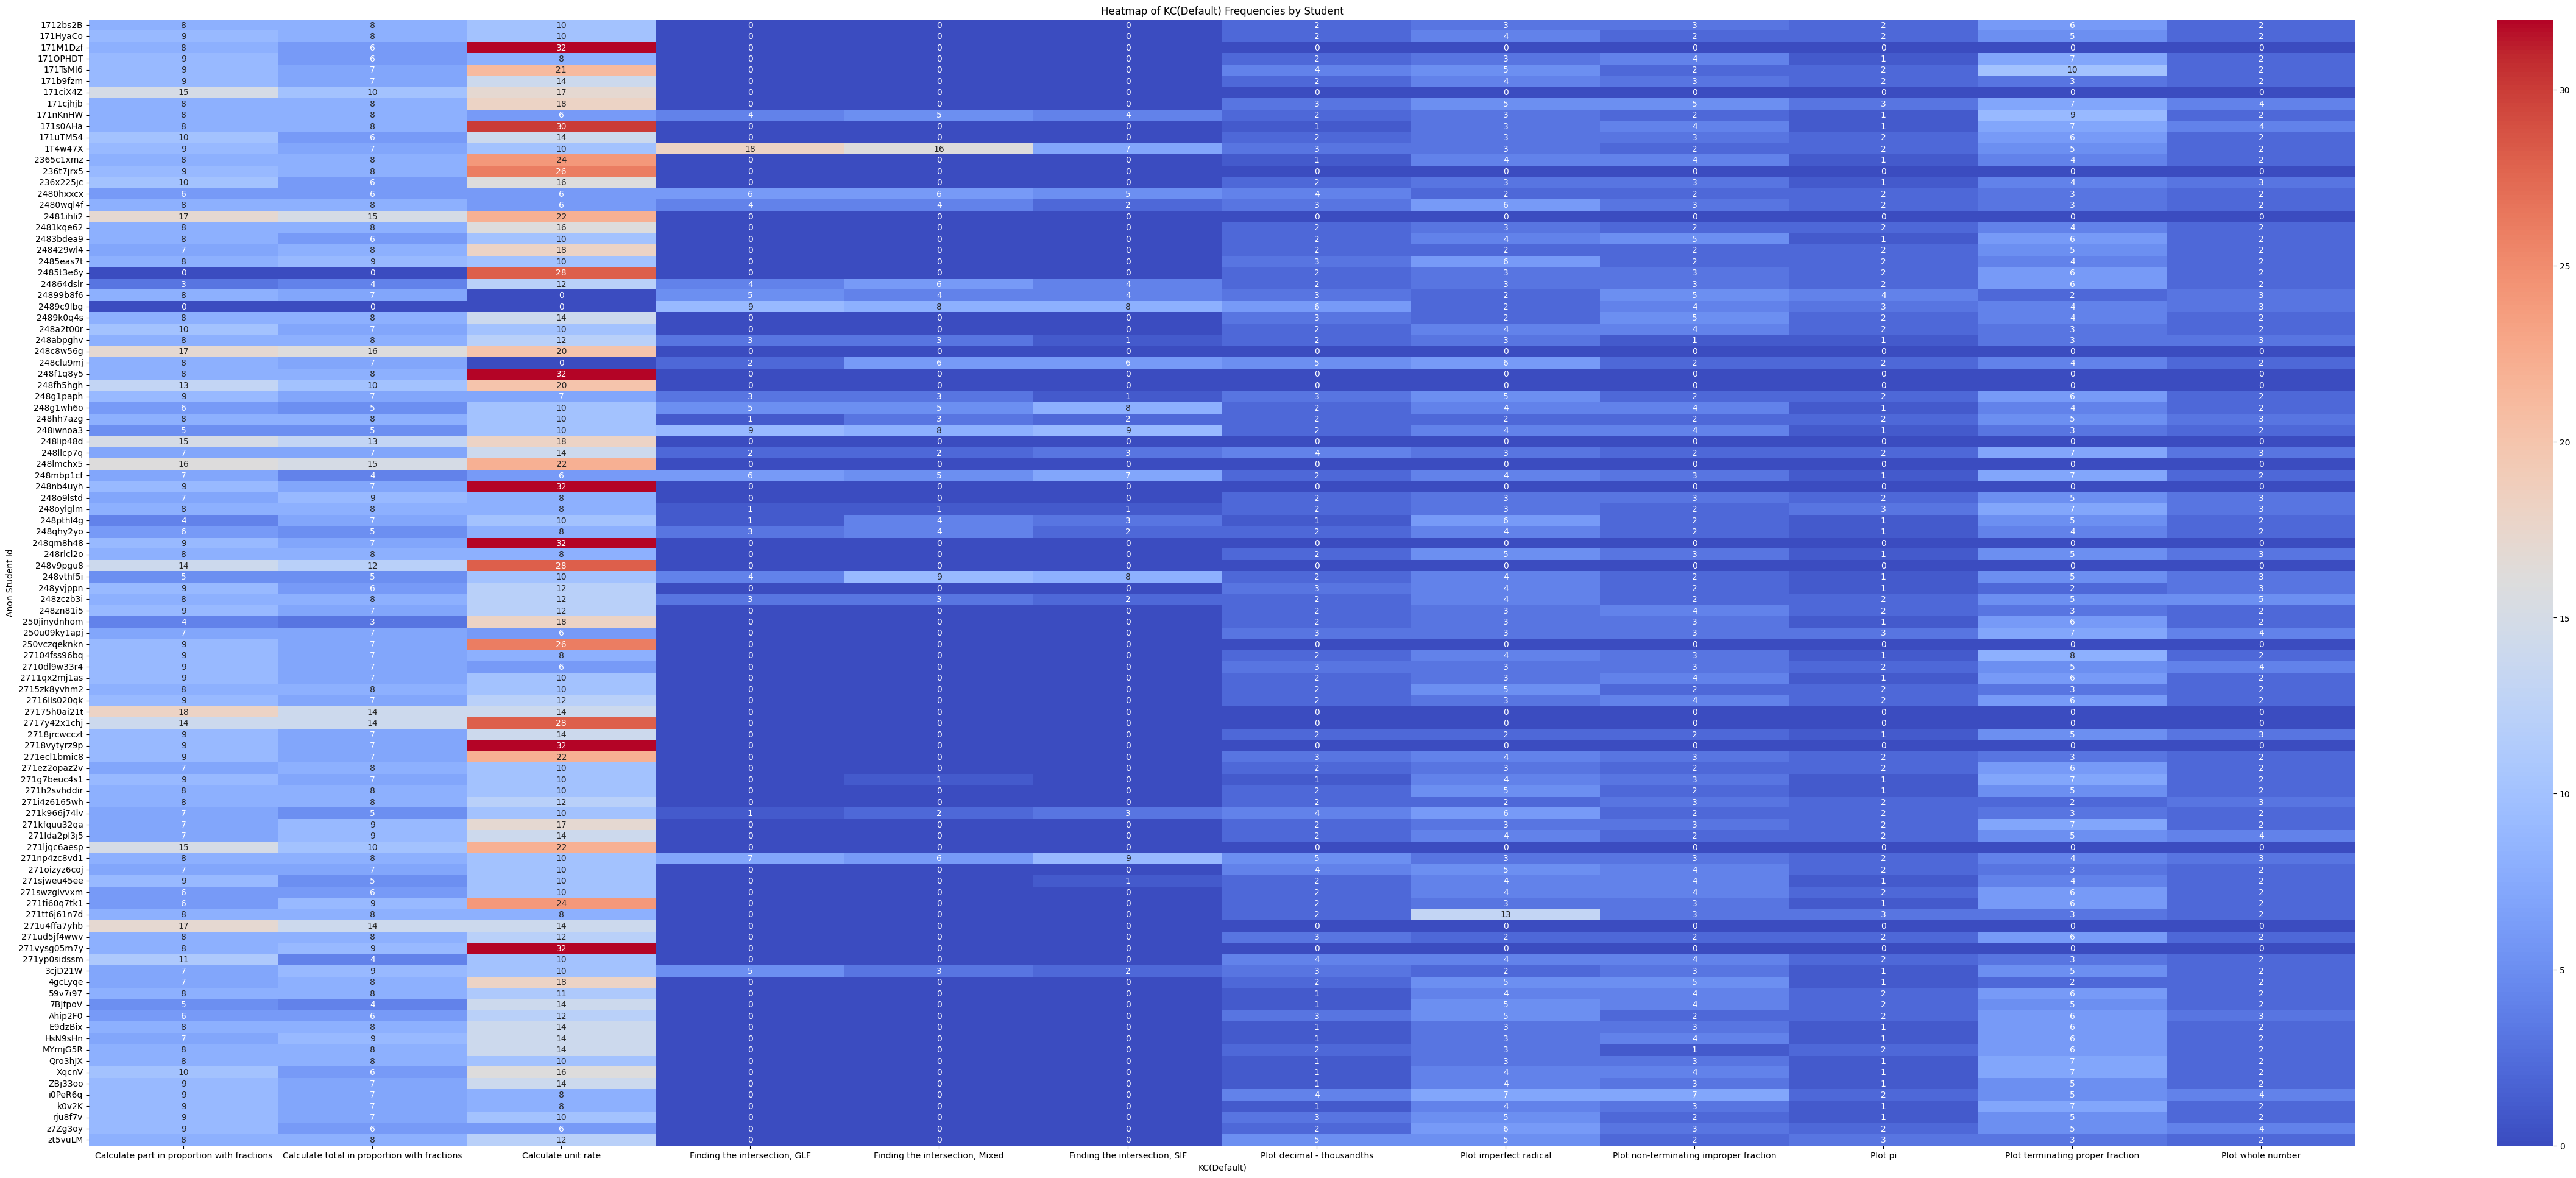

In [15]:

heatmap_data = ct_df.groupby(['Anon Student Id', 'KC(Default)']).size().unstack(fill_value=0)

# Plot the heatmap
plt.figure(figsize=(60, 24))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='d')
plt.title('Heatmap of KC(Default) Frequencies by Student')
plt.xlabel('KC(Default)')
plt.ylabel('Anon Student Id')
plt.show()


In [16]:
ct_df.columns

Index(['Unnamed: 0', 'Row', 'Anon Student Id', 'Problem Hierarchy',
       'Problem Name', 'Problem View', 'Step Name', 'Step Start Time',
       'First Transaction Time', 'Correct Transaction Time', 'Step End Time',
       'Step Duration (sec)', 'Correct Step Duration (sec)',
       'Error Step Duration (sec)', 'Correct First Attempt', 'Incorrects',
       'Hints', 'Corrects', 'KC(Default)', 'Opportunity(Default)',
       'correct_predictions', 'state_predictions'],
      dtype='object')

In [17]:
ct_df = ct_df[['Row','Anon Student Id','KC(Default)','Correct First Attempt','Hints',]]

In [18]:
ct_df

,Row,Anon Student Id,KC(Default),Correct First Attempt,Hints
15707,2834850,1712bs2B,Calculate unit rate,1,0
15708,2834860,1712bs2B,Calculate unit rate,0,0
15709,2834867,1712bs2B,Calculate unit rate,1,0
15710,2834876,1712bs2B,Calculate unit rate,0,0
15711,2834884,1712bs2B,Calculate unit rate,1,0
...,...,...,...,...,...
2004,310760,zt5vuLM,Calculate part in proportion with fractions,1,0
2005,310772,zt5vuLM,Calculate total in proportion with fractions,1,0
2006,310784,zt5vuLM,Calculate part in proportion with fractions,1,0
2007,310796,zt5vuLM,Calculate total in proportion with fractions,1,0


In [19]:
ct_df.to_csv('../Data/cleanedUserData.csv')

# Model fitting

In [20]:
data = pd.read_csv("../Data/cleanedUserData.csv")

In [21]:

defaults = {'order_id': 'Row', 'skill_name': 'KC(Default)', 'correct': 'Correct First Attempt'}

model.fit(data = data, defaults = defaults)

model.params()

value
skill                                        param   class          
Calculate unit rate                          prior   default 0.76122
                                             learns  default 0.06205
                                             guesses default 0.27894
                                             slips   default 0.37246
                                             forgets default 0.00000
Calculate part in proportion with fractions  prior   default 0.53222
                                             learns  default 0.05358
                                             guesses default 0.44360
                                             slips   default 0.10837
                                             forgets default 0.00000
Calculate total in proportion with fractions prior   default 0.43369
                                             learns  default 0.25835
                                             guesses default 0.29727
                                             slips   default 0.15155
                                             forgets default 0.00000
Plot pi                                      prior   default 0.32311
                                             learns  default 0.55477
                                             guesses default 0.46720
                                             slips   default 0.03197
                                             forgets default 0.00000
Plot imperfect radical                       prior   default 0.18373
                                             learns  default 0.08998
                                             guesses default 0.13911
                                             slips   default 0.30153
                                             forgets default 0.00000
Plot non-terminating improper fraction       prior   default 0.49210
                                             learns  default 0.19342
                                             guesses default 0.11833
                                             slips   default 0.22499
                                             forgets default 0.00000
Plot decimal - thousandths                   prior   default 0.20271
                                             learns  default 0.44853
                                             guesses default 0.01832
                                             slips   default 0.32782
                                             forgets default 0.00000
Plot terminating proper fraction             prior   default 0.16644
                                             learns  default 0.12041
                                             guesses default 0.31182
                                             slips   default 0.26576
                                             forgets default 0.00000
Plot whole number                            prior   default 0.87618
                                             learns  default 0.12469
                                             guesses default 0.65359
                                             slips   default 0.10913
                                             forgets default 0.00000
Finding the intersection, Mixed              prior   default 0.59298
                                             learns  default 0.19662
                                             guesses default 0.11984
                                             slips   default 0.29559
                                             forgets default 0.00000
Finding the intersection, GLF                prior   default 0.49956
                                             learns  default 0.22438
                                             guesses default 0.21786
                                             slips   default 0.28652
                                             forgets default 0.00000
Finding the intersection, SIF                prior   default 0.86744
                                             learns  default 

In [22]:

training_acc = model.evaluate(data = ct_df, metric = 'accuracy')
training_acc

0.6623269270510436

In [23]:
training_rmse = model.evaluate(data = ct_df)
training_rmse


0.4588706198290688

In [24]:

training_auc = model.evaluate(data_path = 'ct.csv', metric = 'auc')
training_auc

0.6964789553222018

In [25]:
modelcv = Model(seed = 42)

Cross validation with different configerations

In [26]:
ct_df = pd.read_csv('ct.csv', encoding = 'latin')

In [27]:


crossvalidated_errors = modelcv.crossvalidate(data=ct_df, folds = 5 ,multigs = True)
crossvalidated_errors

,rmse
skill,
Plot non-terminating improper fraction,0.49039
Plot imperfect radical,0.43819
Plot terminating proper fraction,0.46622
Plot pi,0.45845
Plot whole number,0.28271
Plot decimal - thousandths,0.45928
Calculate unit rate,0.47259
Calculate part in proportion with fractions,0.43535
Calculate total in proportion with fractions,0.43510


In [28]:
crossvalidated_errors = modelcv.crossvalidate(data=ct_df, folds = 5 )
crossvalidated_errors

,rmse
skill,
Plot non-terminating improper fraction,0.48296
Plot imperfect radical,0.43874
Plot terminating proper fraction,0.49588
Plot pi,0.46247
Plot whole number,0.28245
Plot decimal - thousandths,0.47374
Calculate unit rate,0.48299
Calculate part in proportion with fractions,0.42792
Calculate total in proportion with fractions,0.42359


In [29]:


crossvalidated_errors = modelcv.crossvalidate(data=ct_df, folds = 5 ,multigs = True, multilearn = True) 
crossvalidated_errors

,rmse
skill,
Plot non-terminating improper fraction,0.49628
Plot imperfect radical,0.44517
Plot terminating proper fraction,0.46357
Plot pi,0.46080
Plot whole number,0.28606
Plot decimal - thousandths,0.46068
Calculate unit rate,0.47126
Calculate part in proportion with fractions,0.43624
Calculate total in proportion with fractions,0.44368


In [30]:
crossvalidated_errors = model.crossvalidate(data=ct_df, folds = 5,metric='auc', multigs =True, multilearn = True)
crossvalidated_errors

,auc
skill,
Plot non-terminating improper fraction,0.58236
Plot imperfect radical,0.63682
Plot terminating proper fraction,0.71410
Plot pi,0.64729
Plot whole number,0.69377
Plot decimal - thousandths,0.69353
Calculate unit rate,0.67927
Calculate part in proportion with fractions,0.62340
Calculate total in proportion with fractions,0.64142


In [31]:
crossvalidated_errors = model.crossvalidate(data=ct_df, folds = 5,metric='log_loss' , multigs = True , multilearn = True)
crossvalidated_errors

,log_loss
skill,
Plot non-terminating improper fraction,0.67879
Plot imperfect radical,0.58810
Plot terminating proper fraction,0.62954
Plot pi,0.60228
Plot whole number,0.34682
Plot decimal - thousandths,0.61717
Calculate unit rate,0.85347
Calculate part in proportion with fractions,0.68337
Calculate total in proportion with fractions,0.70128


benchmarking


In [33]:

benchmark_results = []

ct_df = pd.read_csv('ct.csv')

model_standard = Model(seed=42)
crossvalidated_errors_standard = model_standard.crossvalidate(data=ct_df, folds=5)
benchmark_results.append({'model': 'Standard BKT', 'error': crossvalidated_errors_standard})


model_multigs = Model(seed=42, multigs=True)
crossvalidated_errors_multigs = model_multigs.crossvalidate(data=ct_df, folds=5)
benchmark_results.append({'model': 'BKT with multigs', 'error': crossvalidated_errors_multigs})


model_forget = Model(seed=42)
crossvalidated_errors_forget = model_forget.crossvalidate(data=ct_df, folds=5,)
benchmark_results.append({'model': 'BKT with forgetting', 'error': crossvalidated_errors_forget})

model_multilearn = Model(seed=42, multilearn=True)
crossvalidated_errors_multilearn = model_multilearn.crossvalidate(data=ct_df, folds=5)
benchmark_results.append({'model': 'BKT with multilearn', 'error': crossvalidated_errors_multilearn})


ValueError: provided arguments are not recognized. they must be one or more of: parallel, num_fits, seed, defaults, multilearn, multiprior, multipair, multigs

In [ ]:
for result in benchmark_results:
    print(f"Model: {result['model']} - Cross-Validated Error: {result['error']}")

In [ ]:
import matplotlib.pyplot as plt

# Extract model names and errors
model_names = [r['model'] for r in benchmark_results]
errors = [r['error'] for r in benchmark_results]

# Plot
plt.bar(model_names, errors)
plt.xlabel('Model Variations')
plt.ylabel('Cross-Validated Error')
plt.title('Benchmarking BKT Model Variations')
plt.xticks(rotation=45, ha='right')
plt.show()
